In [31]:
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib



`%matplotlib` prevents importing * from pylab and numpy


In [32]:
import katdal
import katpoint
import scape
import logging
logger = logging.getLogger()
#logger.setLevel(logging.ERROR)

In [33]:
n='/var/kat/archive/data/RTS/telescope_products/2016/01/29/1454054353.h5'
#n='/var/kat/archive/data/RTS/telescope_products/2016/01/29/1454033553.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/12/19/1450486821.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449138207.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/26/1448574519.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/26/1448581975.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/27/1448589427.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/27/1448597061.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449137265.h5'
#n= '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449140896.h5'

In [34]:
h5 = katdal.open(n,centre_freq=12500.5e6)
print h5

Name: /var/kat/archive/data/RTS/telescope_products/2016/01/29/1454054353.h5 (version 3.1)
Observer: RTS  Experiment ID: 20160128-0012
Description: 'RTS: 3.4 Interferometric_Pointing M025 Scanning'
Observed from 2016-01-29 09:59:14.733 SAST to 2016-01-29 10:46:22.537 SAST
Dump rate / period: 1.00042 Hz / 1.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m024,m025                            4       12
Spectral Windows: 1
  ID  Product    CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0              12500.500         856.000          4096      208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m025', 'm024']
  spw=0
-------------------------------------------------------------------------------
Shape: (2829 dumps, 4096 channels, 12 correlation products) => Size: 1.112 GB
Antennas: m024,*m025  Inputs: 4  Autocorr: yes  Crosscorr

In [35]:
N = len(h5.compscan_indices)
print N

7


In [36]:
h5.select(scans='~slew',channels=slice(1024,1024+2048),corrprods = 'cross')
print h5.compscan_indices

[0, 1, 2, 3, 4, 5, 6]


[0, 1, 2, 3, 4, 5, 6]
BusyX

 BusyX 

BusyX 

BusyX 

BusyX 

BusyX 

BusyX


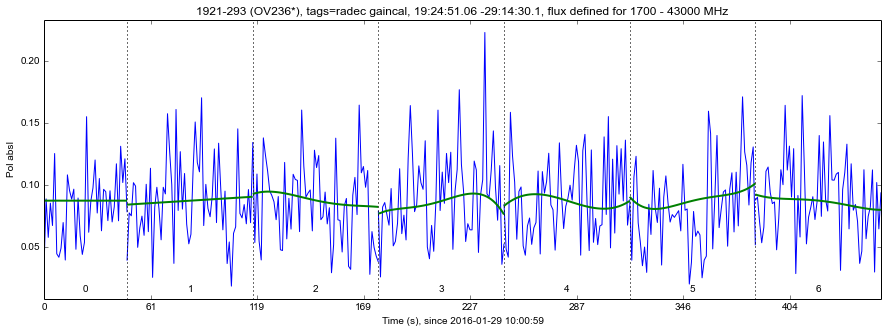

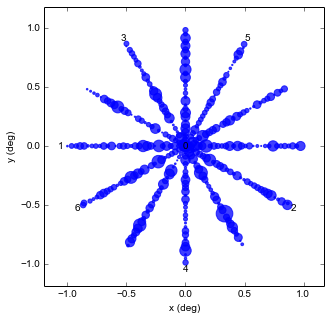

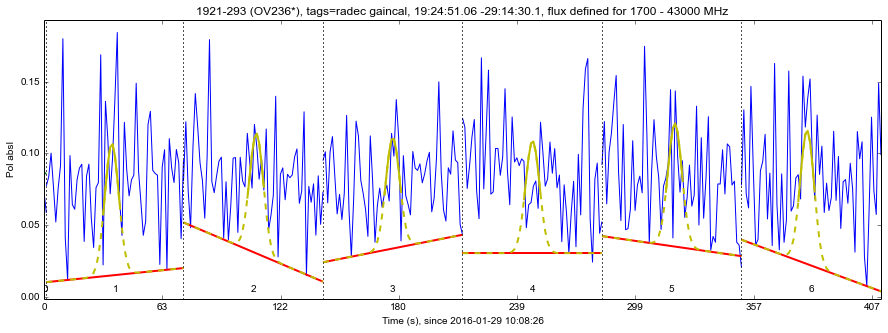

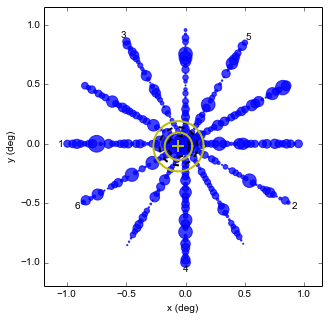

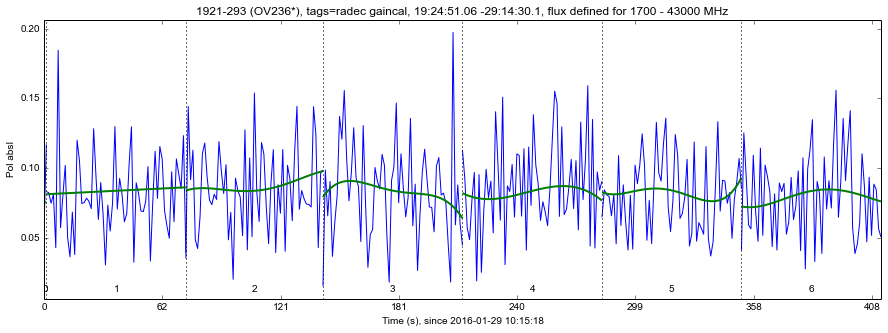

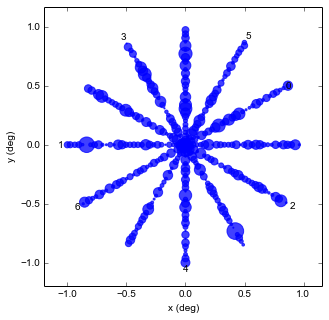

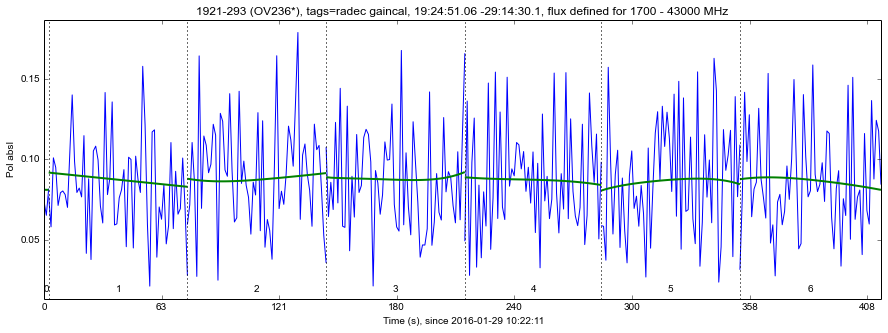

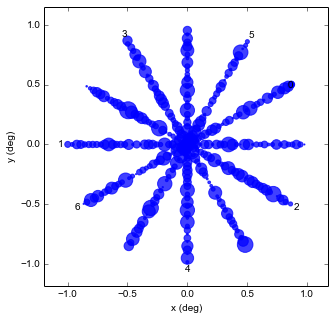

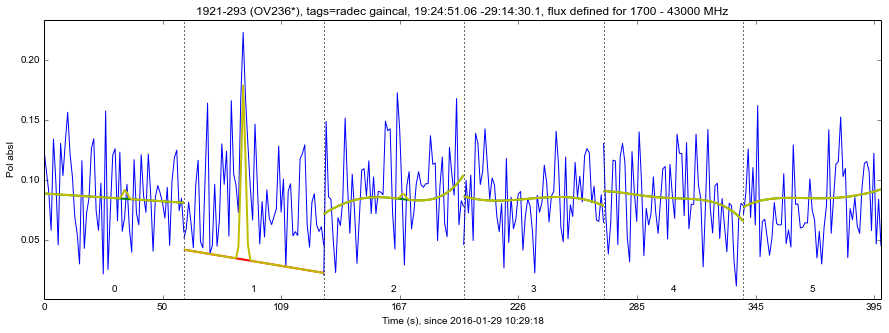

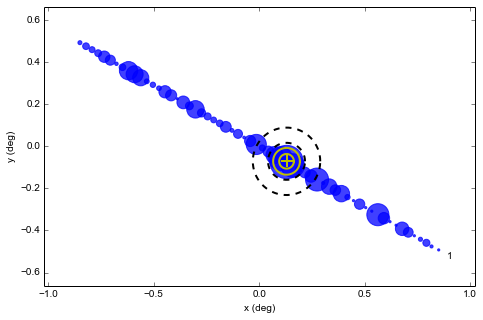

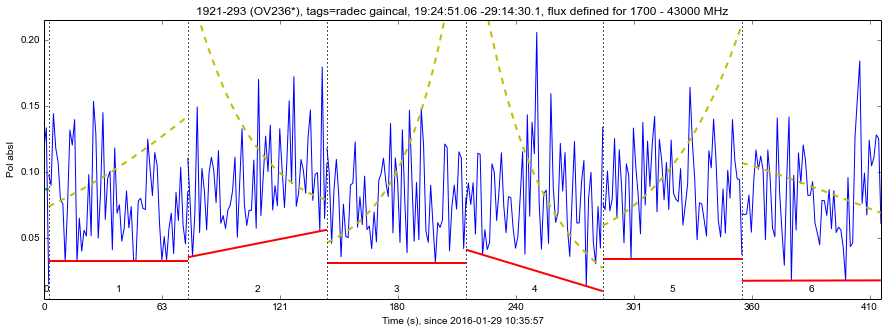

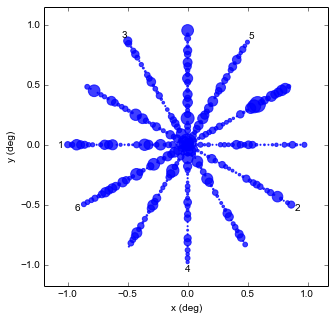

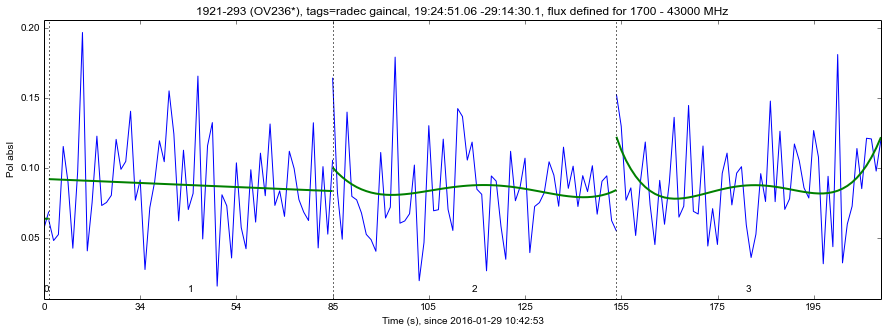

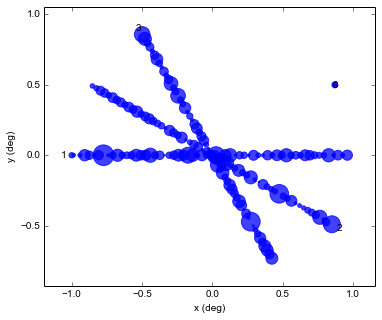

In [37]:

h5.select()
ants = h5.ants
N = len(h5.compscan_indices)
h5.select(scans='track,scan',channels=slice(1024,1024+2048),corrprods = 'cross')
print h5.compscan_indices
for c in h5.compscans():
    d = scape.DataSet(h5,baseline = 'm025,m024')
    #for i in range(len(d.scans)):
    #    d.scans[i].data = scape.stats.remove_spikes(d.scans[i].data,axis=1,spike_width=3,outlier_sigma=5.)    
    d.average()
    print "BusyX",
    d.fit_beams_and_baselines()
    plt.figure(figsize=(15,5))
    scape.plot_compound_scan_in_time(d.compscans[0])
    #pl_title = str(d.compscans[0].target) + '. Compscan %d in %d'%(c[0],N)  '. Beamfit valid: %s'%str(d.compscans[0].beam.is_valid) 
    pl_title = str(d.compscans[0].target)
    plt.title(pl_title) 
    plt.figure(figsize=(15,5))
    scape.plot_compound_scan_on_target(d.compscans[0])
    #print pl_title, d.compscans[0].beam.center

In [38]:
#print d.compscans[0].beam_centre

[0, 1, 2, 3, 4, 5, 6]
Busy24
1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24


1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24


1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24
1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24
1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24
1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


Busy24
1921-293 (OV236*), tags=radec gaincal, 19:24:51.06 -29:14:30.1, flux defined for 1700 - 43000 MHz


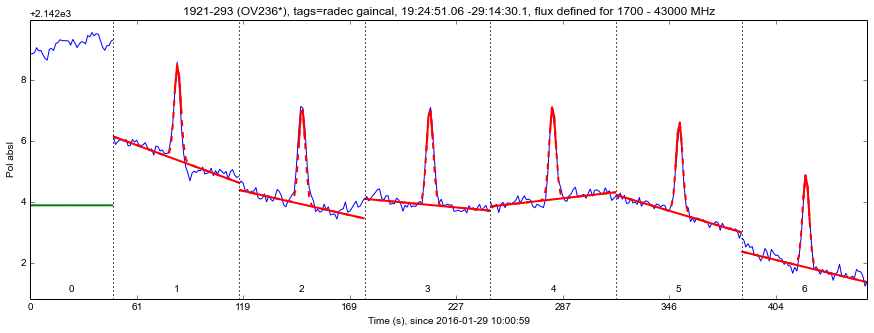

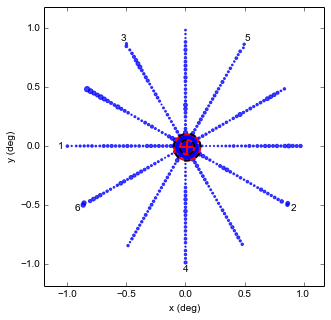

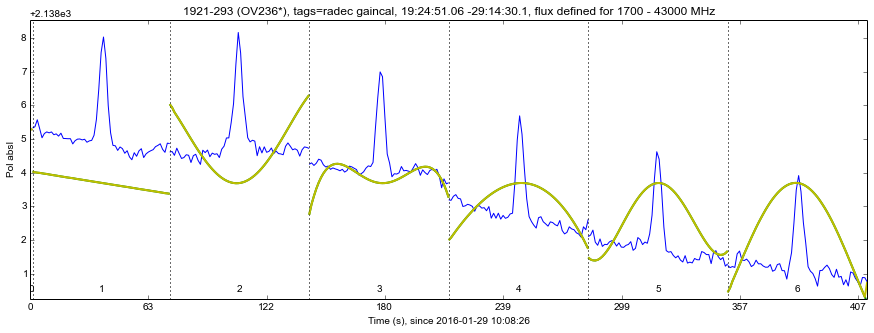

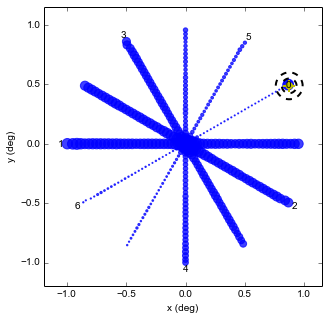

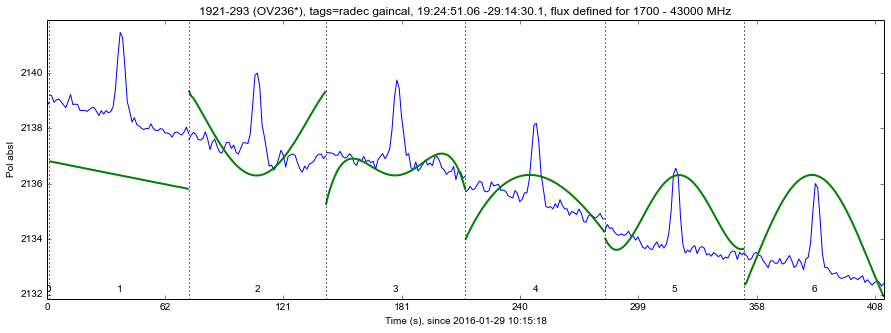

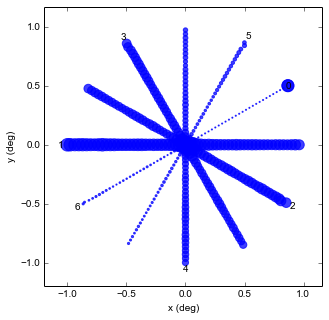

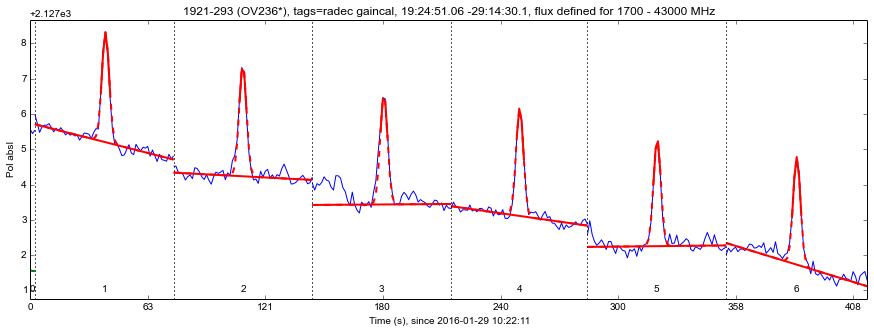

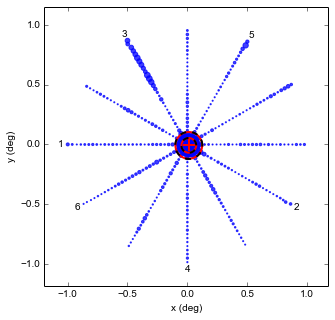

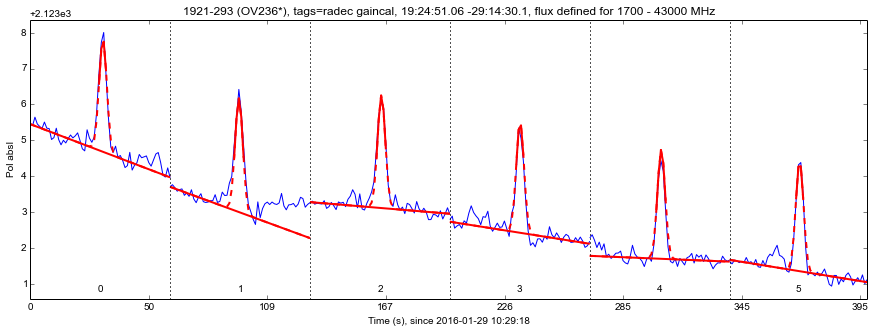

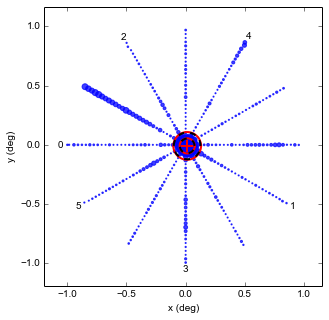

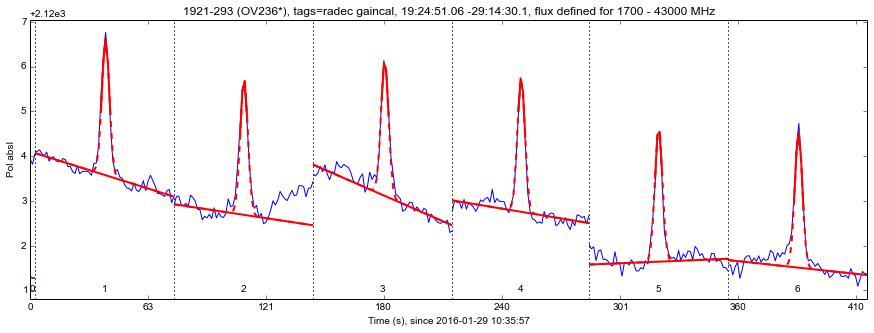

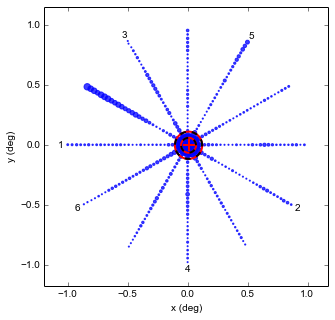

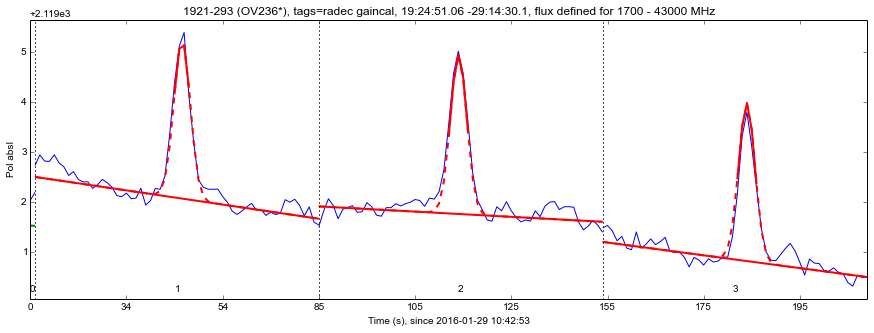

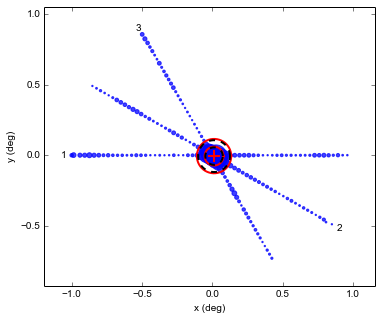

In [39]:

h5.select()
ants = h5.ants
N = len(h5.compscan_indices)
h5.select(scans='track,scan',channels=slice(1024,1024+2048),ants='m025')
print h5.compscan_indices
for c in h5.compscans():
    d = scape.DataSet(h5)
    #for i in range(len(d.scans)):
    #    d.scans[i].data = scape.stats.remove_spikes(d.scans[i].data,axis=1,spike_width=3,outlier_sigma=5.)    
    d.average()
    print "Busy24"
    d.fit_beams_and_baselines()
    figure(figsize=(15,5))
    scape.plot_compound_scan_in_time(d.compscans[0])
    #pl_title = str(d.compscans[0].target) + '. Compscan %d in %d'%(c[0],N) + '. Beamfit valid: %s'%str(d.compscans[0].beam.is_valid) 
    pl_title = str(d.compscans[0].target)
    title(pl_title)
    figure(figsize=(15,5))
    scape.plot_compound_scan_on_target(d.compscans[0])
    print pl_title
    #print d.compscans[0].beam.center